In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from matplotlib import rc
rc("font", family="serif", size=11)

In [98]:
output = pd.read_csv('../data/output_1000stars.csv', usecols=range(1,4))
ID = 11083319
#ID = random.choice(output['ID'])
star = output.loc[(output['ID'] == ID)]
print(star)
output.head()


           ID      Numax  Numax_err
259  11083319  44.015084   2.727756


,ID,Numax,Numax_err
0,10907196,42.981248,1.456479
1,10962775,34.176654,1.342026
2,11177749,33.498019,0.049846
3,11231549,28.981327,0.348002
4,11178396,27.302513,1.358871


In [102]:
modes = pd.read_csv('../data/rgbmodes/modes_'+str(ID)+'.csv', usecols=['f0', 'f0_err'])

modes = modes.sort_values(by=['f0'])
modes = modes.set_index(np.arange(0,len(modes),1))
modes['dnu'] = (modes['f0'].diff(2).shift(-1))/2
dnu_avg = np.mean(modes['dnu'])
n_min = int(modes['f0'].min() / dnu_avg)

n = np.arange(n_min, n_min+len(modes), 1)
modes.insert(loc=0, column='n', value=n)


modes

,n,f0,f0_err,dnu
0,7,33.385122,0.030268,NaN
1,8,37.450272,0.036264,4.056850
2,9,41.498822,0.027044,4.161904
3,10,45.774079,0.030813,4.224105
4,11,49.947033,0.024758,4.217064
5,12,54.208207,0.042612,4.301390
6,13,58.549813,0.088717,4.504210
7,14,63.216627,0.090662,NaN


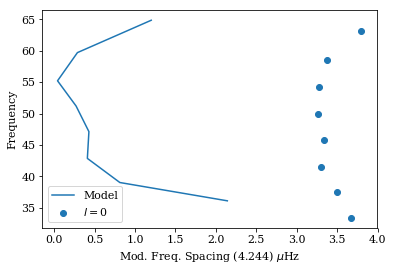

In [131]:
plt.scatter(modes['f0'] % dnu_avg, modes['f0'], label=r'$l=$'+str(0))

def model(n, dnu, nmax, epsilon, k, A, omega, phi, tau):
    freqs = (n + epsilon) * dnu
    freqs += (nmax-n)**2 * k
    freqs += A*np.sin(omega*n + phi)*np.exp(-n/tau)
    return freqs

nmax = 11
epsilon = 1
k = 0.14
A = 1
omega = 5
phi = 2.5
tau = 10

f = model(n, dnu_avg, nmax, epsilon, k, A, omega, phi, tau)

plt.plot(f % dnu_avg, f, label='Model')
plt.ylabel('Frequency')
plt.xlabel(r'Mod. Freq. Spacing ('+ str(u"%.3f" % dnu_avg) +') $\mu$Hz')
plt.legend()
plt.show()